## UAS MATA KULIAH KECERDASAN BUATAN
## NAMA : Kartika Haritami
## NIM     : 09011281621053
## KELAS : SK 7 B

link dataset: https://datahub.io/machine-learning/heart-statlog#readme
<br>link jurnal referensi: https://www.researchgate.net/publication/288871481

In [296]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.activations import sigmoid
from keras.activations import relu
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
np.random.seed(12)

## DATA

pada ANN ini digunakan data set Heart Stat Log dengan atribut sebagai berikut :
* age 
* sex 
* chest pain type (4 values) 
* resting blood pressure 
* serum cholestoral in mg/dl 
* fasting blood sugar > 120 mg/dl 
* resting electrocardiographic results (values 0,1,2) 
* maximum heart rate achieved 
* exercise induced angina 
* oldpeak = ST depression induced by exercise relative to rest 
* the slope of the peak exercise ST segment 
* number of major vessels (0-3) colored by flourosopy 
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

dan Class sebagai Target yang mana bernilai :

0 untuk Absent

1 untuk Present

jadi terdapat 13 featur dan 1 target

In [297]:
dataset = pd.read_csv('data/heartstatlog.csv')


## MELIHAT ISI DATA SET DAN FORMAT DATA SET

In [298]:
dataset.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [299]:
dataset.describe()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


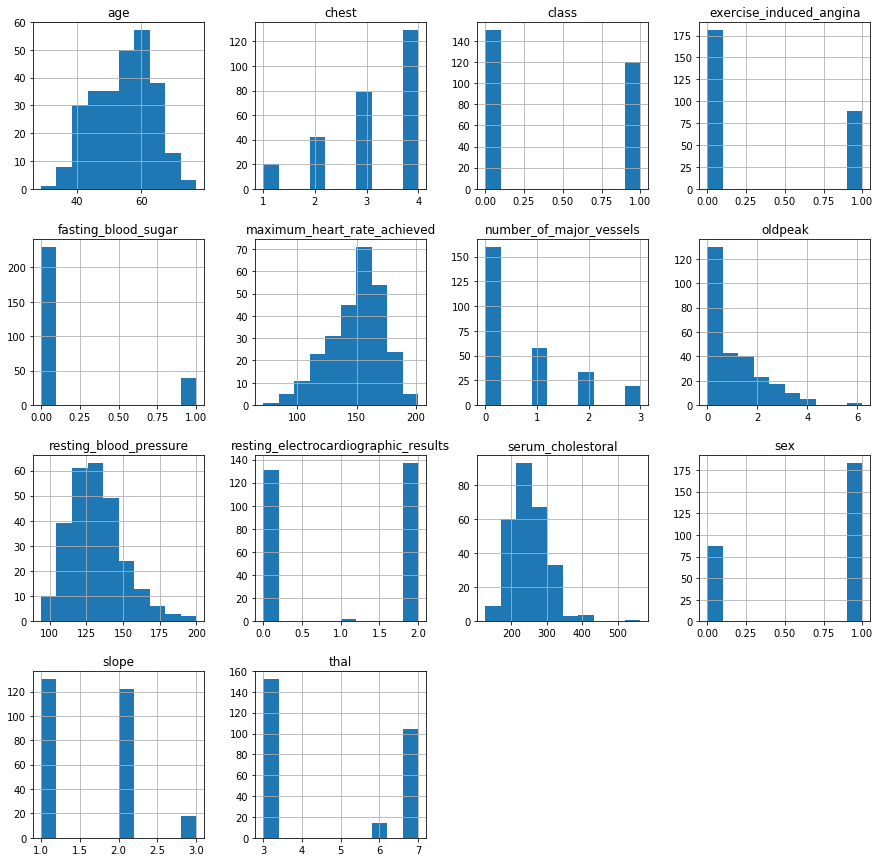

In [300]:
dataset.hist(figsize= (15,15))
plt.show()

## MEMERIKSA DATA SET

dibawah ini adalah hasil info dari data set untuk melihat format data, jumlah data yang terdapat dalam dataset, dan melihat apakah ada data yang hilang/rusak.

In [301]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age                                     270 non-null int64
sex                                     270 non-null int64
chest                                   270 non-null int64
resting_blood_pressure                  270 non-null int64
serum_cholestoral                       270 non-null int64
fasting_blood_sugar                     270 non-null int64
resting_electrocardiographic_results    270 non-null int64
maximum_heart_rate_achieved             270 non-null int64
exercise_induced_angina                 270 non-null int64
oldpeak                                 270 non-null float64
slope                                   270 non-null int64
number_of_major_vessels                 270 non-null int64
thal                                    270 non-null int64
class                                   270 non-null int64
dtypes: float64(1), int64(13)
memory usage: 29.6 KB


## NORMALISASI DATA

disini fitur-fitur yang terdapat pada dataset di normalisasi dan target/classes pada dataset di kategorikan dimana menajdi 1 dan 0 

In [302]:
F = dataset.iloc[:,0:13].values
T = dataset.iloc[:,13].values

In [303]:
FSC = normalize(F, norm='l2', axis=1, copy=True, return_norm=False)
TC = to_categorical(T)

## PEMBAGIAN DATA TRAINING DAN TESTING

dalam pembagian data, data dibagi menjadi 2 bagian yakni trainning dan testing dengan jumlah 80% untuk trainning dan 20% untuk testing

In [304]:
training_FSC, testing_FSC, training_T, testing_T = train_test_split(FSC, TC, test_size=0.20 )

## MODEL

pada Neural Network ini terdapat 4 layer yakni :

* 1 layer input dengan jumlah inputan 13
* 2 Hiden Layer yang mana Hiden Layer 1 dengan 55 Nueuron dan Hiden layer 2 dengan 55 Neuron
* 1 Layer output dengan jumlah neuron 2




In [305]:
model = Sequential()
model.add(Dense(55, input_dim=13, activation='relu'))
model.add(Dense(55, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))

## Compile 

Dimana pada Neural Network ini bertujuan untuk mengklasifikasi dengan output Absent atau Present dalam bentuk categorical , maka lost function yang cocok digunakan ialah Log Loss yang mana disini digunakan Categorical Cross Entropy

In [315]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## FIT

Pada Neural Netwrok ini digunakan 500 epoch dengan jumlah batch yakni 10.

disini batch adalah jumlah data yang dilearning dalam 1 kali iterasi.

In [307]:
proc=model.fit(training_FSC, training_T,validation_data=(testing_FSC,testing_T), epochs = 200 , batch_size = 10)

Train on 216 samples, validate on 54 samples
Epoch 1/200
216/216 [==============================] - 2s 11ms/step - loss: 0.7586 - acc: 0.4769 - val_loss: 0.7276 - val_acc: 0.3148
Epoch 2/200
216/216 [==============================] - 0s 559us/step - loss: 0.6942 - acc: 0.4954 - val_loss: 0.6677 - val_acc: 0.6852
Epoch 3/200
216/216 [==============================] - 0s 674us/step - loss: 0.6923 - acc: 0.5231 - val_loss: 0.6674 - val_acc: 0.6852
Epoch 4/200
216/216 [==============================] - 0s 629us/step - loss: 0.6904 - acc: 0.5231 - val_loss: 0.6732 - val_acc: 0.6852
Epoch 5/200
216/216 [==============================] - 0s 517us/step - loss: 0.6931 - acc: 0.4954 - val_loss: 0.6778 - val_acc: 0.6852
Epoch 6/200
216/216 [==============================] - 0s 683us/step - loss: 0.6876 - acc: 0.5231 - val_loss: 0.6600 - val_acc: 0.6852
Epoch 7/200
216/216 [==============================] - 0s 511us/step - loss: 0.6861 - acc: 0.5648 - val_loss: 0.6686 - val_acc: 0.6852
Epoch 8/200

Epoch 61/200
216/216 [==============================] - 0s 695us/step - loss: 0.4700 - acc: 0.7685 - val_loss: 0.4770 - val_acc: 0.8148
Epoch 62/200
216/216 [==============================] - 0s 600us/step - loss: 0.4746 - acc: 0.7546 - val_loss: 0.5112 - val_acc: 0.7963
Epoch 63/200
216/216 [==============================] - 0s 578us/step - loss: 0.4723 - acc: 0.7407 - val_loss: 0.5050 - val_acc: 0.7963
Epoch 64/200
216/216 [==============================] - 0s 545us/step - loss: 0.4718 - acc: 0.7778 - val_loss: 0.4551 - val_acc: 0.7963
Epoch 65/200
216/216 [==============================] - 0s 511us/step - loss: 0.4893 - acc: 0.7593 - val_loss: 0.5429 - val_acc: 0.7778
Epoch 66/200
216/216 [==============================] - 0s 389us/step - loss: 0.4713 - acc: 0.7407 - val_loss: 0.5517 - val_acc: 0.7778
Epoch 67/200
216/216 [==============================] - 0s 434us/step - loss: 0.4667 - acc: 0.7824 - val_loss: 0.4859 - val_acc: 0.7963
Epoch 68/200
216/216 [==========================

Epoch 121/200
216/216 [==============================] - 0s 387us/step - loss: 0.3834 - acc: 0.8102 - val_loss: 0.6046 - val_acc: 0.7407
Epoch 122/200
216/216 [==============================] - 0s 727us/step - loss: 0.3925 - acc: 0.8056 - val_loss: 0.4556 - val_acc: 0.8333
Epoch 123/200
216/216 [==============================] - 0s 408us/step - loss: 0.3874 - acc: 0.8102 - val_loss: 0.4215 - val_acc: 0.8333
Epoch 124/200
216/216 [==============================] - ETA: 0s - loss: 0.3783 - acc: 0.813 - 0s 443us/step - loss: 0.3810 - acc: 0.8148 - val_loss: 0.4832 - val_acc: 0.7963
Epoch 125/200
216/216 [==============================] - 0s 446us/step - loss: 0.3813 - acc: 0.8287 - val_loss: 0.4381 - val_acc: 0.8333
Epoch 126/200
216/216 [==============================] - 0s 439us/step - loss: 0.3716 - acc: 0.8194 - val_loss: 0.5517 - val_acc: 0.7593
Epoch 127/200
216/216 [==============================] - 0s 412us/step - loss: 0.3798 - acc: 0.8102 - val_loss: 0.4131 - val_acc: 0.8519
Epo

In [308]:
akurasi_train =model.evaluate(training_FSC, training_T)
print('Testing akurasi adalah {} %'.format(akurasi_train[1]*100))

216/216 [==============================] - 0s 100us/step
Testing akurasi adalah 84.72222222222221 %


In [309]:
akurasi_test = model.evaluate(testing_FSC, testing_T)
print("Akurasi data testing = %.2f%%" % (akurasi_test[1]*100))

54/54 [==============================] - 0s 191us/step
Akurasi data testing = 83.33%


## PLOT HASIL AKURASI MODEL DAN LOSS

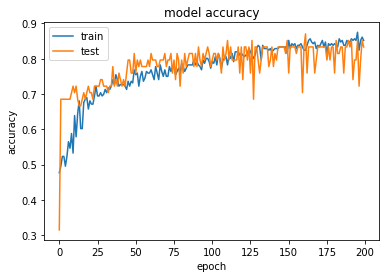

In [310]:
plt.plot(proc.history['acc'])
plt.plot(proc.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

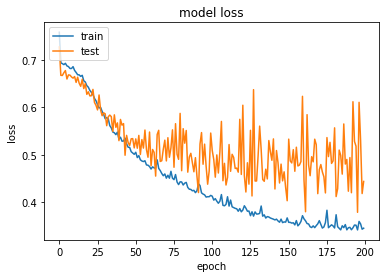

In [311]:
plt.plot(proc.history['loss'])
plt.plot(proc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## CONFUSION MATRIX

In [312]:
Prediksi_Target = model.predict(testing_FSC)
cm = confusion_matrix(testing_T.argmax(axis=1),Prediksi_Target.argmax(axis=1))

[[29  8]
 [ 1 16]]


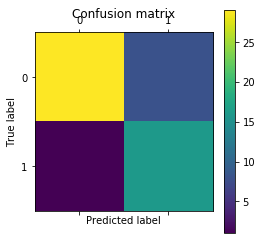

In [313]:
print (cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [316]:
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.7837837837837838
Specificity :  0.9411764705882353


## ROC GRAPH

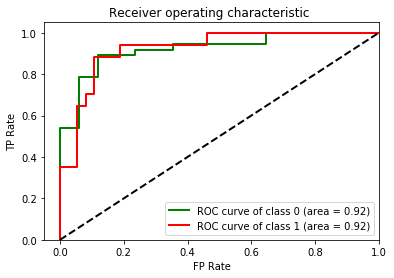

In [314]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle

n_classes = TC.shape[1]
lw = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testing_T[:, i], Prediksi_Target[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['green',  'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()
